### Homework 4

Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. You are not allowed to use ChatGPT to answer any of the questions. 

---

#### Q1 - (10 points) Why Bagged-decision trees and Random Forests are considered "ensemble learning" techniques? Compare these models and fully explain their differences and points they have in common. 

Bagged-decision trees and random forests are considered "ensemble learning" techniques becuase they look at a lot of decision trees - an ensemble of decision trees to create a stronger overall model.

Bagged-decision trees use random bootstrap samples (sample with replacement) of data and aggregates predictions from an ensemble of trees using majority voting for classification or taking average values for regression. It has access to ALL features when making the best split.

Random Forests is similar to bagged-decision tree and also uses random bootstrap samples, but looks at a random subset of features (sqrt(n) features for classification or n/3 for regression, where n is total number of features). Because of the added randomness, random forests are better at reducing correlation between trees, making the model more robust and less prone to overfitting.



#### Q2 - (40 points) Complete these questions:
- (30 points) Use the weather dataset provided in the lecture slides, and construct the decision tree until the leaf nodes are homogeneous in terms of the class label "Played". Use Information Gain as your criterion. Provide the comoutations for calculating the Information Gain during the Greedy search method and mathematically justify why a feature is selected at each decision node. 
- (10 points) Provide a visualization of the entire tree. At last, extract 4 decision rules and provide them in your answer. 

Outlook:

Sunny (5 total): 3 Yes, 2 No, E(sunny) = -(3/5)log₂(3/5) - (2/5)log₂(2/5) = 0.971 bits

Overcast (4 total): 4 Yes, 0 No, E(overcast) = 0 bits

Rain (5 total): 3 Yes, 2 No, E(rain) = -(3/5)log₂(3/5) - (2/5)log₂(2/5) = 0.971 bits

IG(outlook) = 0.85 - [(5/14)(0.971) + (4/14)(0) + (5/14)(0.971)] = 0.156 bits

---

Temperature:

Hot (3 total): 1 Yes, 2 No, E(hot) = -(1/3)log₂(1/3) - (2/3)log₂(2/3) = 0.918 bits

Mild (6 total): 4 Yes, 2 No, E(mild) = -(4/6)log₂(4/6) - (2/6)log₂(2/6) = 0.918 bits

Cool (5 total): 5 Yes, 0 No, E(cool) = 0 bits

IG(temperature) = 0.85 - [(3/14)(0.918) + (6/14)(0.918) + (5/14)(0)] = 0.457 bits

---

Humidity:

less than/equal to 75: 7 Yes, 1 No, greater than 75: 3 Yes, 3 No

E(≤75) = -(7/8)log₂(7/8) - (1/8)log₂(1/8) = 0.544 bits

E(>75) = -(3/6)log₂(3/6) - (3/6)log₂(3/6) = 1.0 bits

IG(humidity) = 0.85 - [(8/14)(0.544) + (6/14)(1.0)] = 0.109 bits

---

Windy:

False (8 total): 6 Yes, 2 No, E(false) = -(6/8)log₂(6/8) - (2/8)log₂(2/8) = 0.811 bits

True (6 total): 4 Yes, 2 No

E(true) = -(4/6)log₂(4/6) - (2/6)log₂(2/6) = 0.918 bits

IG(windy) = 0.85 - [(8/14)(0.811) + (6/14)(0.918)] = -0.007 bits

---
![Decision Tree](Untitled.png)
---

Decision Rules:

If Temperature = Cool → Play = Yes

If Temperature = Hot AND Outlook = Overcast → Play = Yes

If Temperature = Mild AND Outlook = Sunny AND Humidity ≤ 75 → Play = Yes

If Temperature = Mild AND Outlook = Rain AND Windy = Yes → Play = No


#### Q3- (10 points) What are the differences between Agglomerative Clustering and K-Means Clustering? Fully explain in details in terms of the methodology used. 

K-means clustering starts with pre-specified k number of random centroids. Using distance calculations (usually Euclidean), it partitions each data point into a cluster. K-means assumes that clusters are spherical and it is a non-deterministic model - meaning that results may vary. It has the advantage of being memory efficient and suitable for large databases.

Agglomerative clustering starts with each data point and merges the closest cluster until it reaches a stopping condition. This is a hierarchical bottom-up approach creating a hierarchical tree structure called a dendrogram. Nubmer of clusters is chosen after seeing the model's hierarchy. Aggolomerative clustering can handle non-spherical clusters and is deterministic - meaning that you get the same results each run. Unlike k-means, it is better for smaller datasets.

#### Q4- (10 points) Explain how the number of clusters can be determined in K-means clustering? Fully explain the methodology. 

The number of clusters is determined with two methods - the elbow technique and the silhouette score.

The elbow technique plots distortion/inertia against the number of clusters k, where distorition is the sum of squared distances of samples to their closest cluster center, and distorition is the average squared errors or distances from each point to its centroid. The optimal number of clusters is located at the elbow point of the graph - where adding clusters don't decrease distorition as much. 

The silhouette score is more rigorous than the elbow technique - it is a measurement of how similar a data point is to its own cluster, as compared with other clusters. 
- a(i) = average distance to points in same cluster
- b(i) = average distance to points in nearest neighboring cluster
- Silhouette score = (b(i) - a(i)) / max(a(i), b(i))


The resulting score ranges from -1 to +1, where a higher score indicates better-defined clusters. Overall, the silhouette score evaluates how well the data has been clustered.


#### Q5- (20 points) You are given a dataset: vehicles.csv. 

Dataset Columns:
VehicleID: Unique identifier for each vehicle.
EngineSize: Engine size in liters.
Horsepower: Horsepower of the vehicle.
Weight: Weight of the vehicle in pounds.
MPG_City: Miles per gallon in city driving.
MPG_Highway: Miles per gallon on the highway.
Price: Price of the vehicle in dollars.

You are provided with the implementation and results of performing k-means clustering on the vehicles dataset (see below). Based on all the provided results and code, answer the following questions: 
- (5 points) Determine the best number of clusters (i.e., k) by checking the results of elbow method. Explain why you think this is the best number of clusters. Put the correct number of Optimal number of clusters in the code and re-run the code to provide cluster visualization. 
- (3 points) What does the computed Silhouette score determine? 
- (12 points) Fully discuss the results and what they imply about the different groups of vehicles.  Remember, the best number of clusters should provide meaningful clusters. 

The number of best clusters (k): 2, at the elbow joint where adding more clusters doesn't decrease distortion as much.


The computed silhouette score is 0.581 which means the clusters are semi-well-defined. 


The results of the clustering implies that there are 2 types of vehicles represented in this data. The red cluster represents more expensive, luxury cars which have larger engine sizes, more powerful engines, heavier in weight, and less fuel efficient. Meanwhile, the blue cluster represents less expensive economical cars that have smaller and less powerful engines, while being lighter in weight and more fuel efficient. The silhouette score means the clusters are semi-well-defined, and logically this makes sense as the data in this car is categorized similarly to real-world vehicles with luxury cars and more economical cars on the market. Furthermore, the clusters seem reasonably far apart to indicate two defined groups.



In the code below, we import the dataset vehicles.csv into a Pandas DataFrame. We drop the VehicleID column as it is not a relevant feature for clustering. Then we standardize the features to have zero mean and unit variance.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('vehicles.csv')

# Drop the VehicleID column
df = df.drop('VehicleID', axis=1)

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df)


Here, we use the Elbow Method to determine the optimal number of clusters (k). We plot the results.

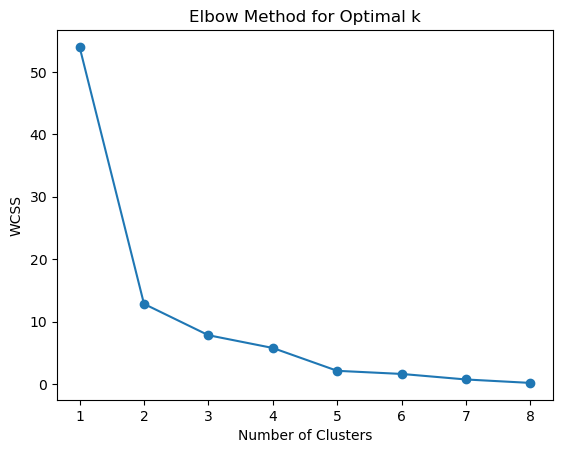

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(standardized_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure()
plt.plot(range(1, 9), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Here, we calculate the silhouette score.

In [8]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(standardized_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Discuss the results


Silhouette Score: 0.5810452344180216


In [6]:
# Optimal number of clusters 
optimal_clusters = 2

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels


         EngineSize  Horsepower  Weight  MPG_City  MPG_Highway    Price
Cluster                                                                
0             3.325       262.5  3625.0      17.5         24.5  30000.0
1             2.020       150.0  3000.0      24.6         31.2  20000.0


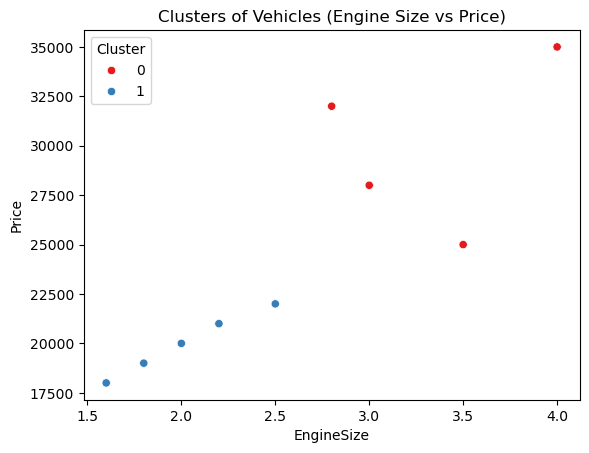

In [7]:
# Analyze the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters
import seaborn as sns

# Scatter plot of EngineSize vs Price, color-coded by cluster
plt.figure()
sns.scatterplot(x='EngineSize', y='Price', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Vehicles (Engine Size vs Price)')
plt.show()


#### Q6 - Explain how eigen values and eigen vectors are computed in Principal Component Analysis. Next, create a numerical example and provide your computations for eigen vectors and eigen values based on the lecture. In your example, assume that there are only 3 input features and 10 observations in your dataset. 

In [ ]:
import numpy as np

# Create dataset with 3 input features and 10 observations
X = np.array([
    [2, 4, 6, 8, 10, 1, 3, 5, 7, 9], # x1
    [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],  # x2
    [5, 6, 7, 8, 9, 4, 5, 6, 7, 8]   # x3
])

def standardize(X):
    """
    Standardize dataset with Z-score normalization
    Formula: z = (x - μ) / σ
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    Z = (X - mean) / std
    return Z, mean, std

def compute_covariance_matrix(Z):
    """
    Compute covariance matrix
    Formulz: cov(X,Y) = Σ(xy)/(n-1) (μx = μy = 0 when standardized)
    """
    n = Z.shape[0]
    covariance_matrix = np.dot(Z.T, Z) / (n-1)
    return covariance_matrix

def compute_eigenvectors(covariance_matrix):
    """
    Compute eigenvalues and eigenvectors
    Eigenvalues: det(Σ - λI) = 0 
    Eigenvectors: (Σ - λI)v = 0 
    """
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvalues and eigenvectors in dsescending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

def explained_variance_ratio(eigenvalues):
    """
    Compute explained variance ratio
    Formula: λᵢ / Σλⱼ
    """
    return eigenvalues / np.sum(eigenvalues)

def transform_data(Z, eigenvectors, n_components):
    """
    Transform the data using selected principal components
    Formula: Z × W where W is the eigenvector matrix
    """
    return np.dot(Z, eigenvectors[:, :n_components])

# First, standardize data
Z, mean, std = standardize(X)
print("\nStandardized data:")
print(Z[:3])

# Secondly, compute covariance matrix
covariance_matrix = compute_covariance_matrix(Z)
print("\nCovariance matrix:")
print(covariance_matrix)

# Third, compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = compute_eigenvectors(covariance_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Fourth, calculate explained variance ratio
variance_ratio = explained_variance_ratio(eigenvalues)
print("\nExplained variance ratio:")
print(variance_ratio)
print(f"Total variance explained by first two components: {np.sum(variance_ratio[:2])*100:.2f}%")

# Finally, traansform the data
n_components = 2  # Reduce to 2 dimensisons
transformed_data = transform_data(Z, eigenvectors, n_components)
print("\nTransformed data:")
print(transformed_data[:3])


Standardized data:
[[-0.39223227  0.          0.39223227  0.70710678  0.9258201  -0.70710678
  -0.26726124  0.26726124  0.70710678  0.98058068]
 [-0.98058068 -1.22474487 -1.37281295 -1.41421356 -1.38873015 -0.70710678
  -1.06904497 -1.33630621 -1.41421356 -1.37281295]
 [ 1.37281295  1.22474487  0.98058068  0.70710678  0.46291005  1.41421356
   1.33630621  1.06904497  0.70710678  0.39223227]]

Covariance matrix:
[[1.5        1.44115338 1.26923077 1.04006287 0.81705717 1.45608802
  1.49380589 1.33656317 1.04006287 0.75      ]
 [1.44115338 1.5        1.44115338 1.29903811 1.13389342 1.29903811
  1.47297076 1.47297076 1.29903811 1.08086504]
 [1.26923077 1.44115338 1.5        1.45608802 1.36176195 1.04006287
  1.33656317 1.49380589 1.45608802 1.32692308]
 [1.04006287 1.29903811 1.45608802 1.5        1.47297076 0.75
  1.13389342 1.41736677 1.5        1.45608802]
 [0.81705717 1.13389342 1.36176195 1.47297076 1.5        0.49099025
  0.92788436 1.29903811 1.47297076 1.49793814]
 [1.45608802 1.

#### Q7 - (15 points) Consider the table of measured data given below:
![Generated Dataset](pic1.png)

The goal is to build a decision tree model to predict the outcome y using the two features $x_1$,$x_2$, where each feature $x_1$,$x_2$ can take one of the three values: a, b, c. 

hint: 
- $log_2 (0.4) = -1.32 $                   
- $log_2 (0.6) = -0.73 $
- $log_2 (0.5) = -1 $                        
- $log_2 (0.75) = -0.41 $
- $log_2 (0.25) = -2 $


Answer the following questions: 

- Compute the entropy of the target variable y (round to 3 decimal places). Include all your assumptions. Entropy(y) = ?
- Compute the information gain for $x_1$ and $x_2$ attributes and show your work. Based on the computed values, indicate which attribute ($x_1$ or $x_2$) should be selected first in the split strategy during model construction. Show your computation and use the provided contingency table below, which is obtained from the information in the dataset in the table above.

![Generated Dataset](cont.jpg)

Entropy:
P(y=0) = 4/10 = 0.4
P(y=1) = 6/10 = 0.6


Entropy(y) = -P(y=0)log₂(P(y=0)) - P(y=1)log₂(P(y=1))
= -(0.4 × -1.32) - (0.6 × -0.73)
= 0.528 + 0.438
= 0.966 bits 


Information Gain:

For x₁:

P(x₁=a) = 4/10 = 0.4

P(x₁=b) = 2/10 = 0.2

P(x₁=c) = 4/10 = 0.4

E(y|x₁=a) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = 1

E(y|x₁=b) = -(0/2)log₂(0/2) - (2/2)log₂(2/2) = 0

E(y|x₁=c) = -(2/4)log₂(2/4) - (2/4)log₂(2/4) = 1

IG(x₁) = E(y) - [P(x₁=a)E(y|x₁=a) + P(x₁=b)E(y|x₁=b) + P(x₁=c)E(y|x₁=c)]

= 0.966 - [0.4(1) + 0.2(0) + 0.4(1)]

= 0.166


For x₂:

P(x₂=a) = 4/10 = 0.4

P(x₂=b) = 2/10 = 0.2

P(x₂=c) = 4/10 = 0.4

E(y|x₂=a) = -(1/4)log₂(1/4) - (3/4)log₂(3/4) = 0.811

E(y|x₂=b) = -(2/2)log₂(2/2) - (0/2)log₂(0/2) = 0

E(y|x₂=c) = -(1/4)log₂(1/4) - (3/4)log₂(3/4) = 0.811

IG(x₂) = E(y) - [P(x₂=a)E(y|x₂=a) + P(x₂=b)E(y|x₂=b) + P(x₂=c)E(y|x₂=c)]

= 0.966 - [0.4(0.811) + 0.2(0) + 0.4(0.811)]

= 0.317

IG(x₂) = 0.317 > IG(x₁) = 0.166, so attribute x₂ should be selected first in the split strategy during model construction.

#### Q8 - (5 points) Explain how Random Forest algorithm controls the number of features to find the best split? 

Random Forest algorithms use a method called feature bagging. Random forests only try a random subset of features given a dataset. If a dataset has p number of features, Random Forest will use sqrt(p) features for classification problems and p/3 features for regression problems. At each split, instead of considering all the features, it randomly selects a subset of features. Within that split, it finds the most optimal split. This repeats each node, and the addition of randomness reduces correlation between different trees, which helps the model from overfitting.